# AI Integrator Adjustment Notebook

<a href="https://colab.research.google.com/github/auto-res/researchgraph/blob/develop/examples/ai_integrator_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install unsloth "xformers==0.0.28.post2"
%pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
%pip install researchgraph==0.0.75
%pip install transformers==4.46.2

In [3]:
%pip show researchgraph

Name: researchgraph
Version: 0.0.75
Summary: Add your description here
Home-page: https://www.autores.one/english
Author: 
Author-email: Toma Tanaka <ulti4929@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aider-chat, arxiv, jinja2, langchain, langchain-community, langgraph, litellm, llmlinks, openai, pandas, pyalex, pydantic, pypdf, semanticscholar, setuptools, tomli, tomli-w
Required-by: 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

Mounted at /content/drive


# AI Integrator

In [9]:
from researchgraph.graphs.ai_integrator.ai_integrator_v1 import (
    AIIntegratorv1,
    ai_integrator_v1_extractor_prompt,
    ai_integrator_v1_codeextractor_prompt,
    ai_integrator_v1_creator_prompt,
    ai_integratorv1_setting,
)

In [6]:
from pprint import pprint

pprint(ai_integratorv1_setting)

{'arxiv_url': 'https://arxiv.org/abs/1804.00325v3',
 'base_method_code': '\n'
                     'from torch.optim import Optimizer\n'
                     '\n'
                     'class Adam(Optimizer):\n'
                     '    def __init__(self, params: Iterable, lr: float = '
                     '1e-3, beta1: float = 0.9, beta2: float = 0.999, epsilon: '
                     'float = 1e-8):\n'
                     '        defaults = dict(\n'
                     '            lr=lr,\n'
                     '            beta1=beta1,\n'
                     '            beta2=beta2,\n'
                     '            epsilon=epsilon,\n'
                     '            step=0\n'
                     '        )\n'
                     '        super(Adam, self).__init__(params, defaults)\n'
                     '\n'
                     '    def step(self, closure: None = None) -> None:\n'
                     '        for group in self.param_groups:\n'
                    

In [7]:
# Change the paper to be integrated
# ai_integratorv1_setting["arxiv_url"] = "https://arxiv.org/abs/2101.11075v3"
# ai_integratorv1_setting["github_url"] = "https://github.com/facebookresearch/madgrad"

In [ ]:
# AI Integrator settings
llm_name = "gpt-4o-2024-08-06"  # LLM that executes AI Integrator
save_dir = "/content/drive/MyDrive/AutoRes/ai_integrator/exec-test"  # Directory to save all output results
ft_model_name = "unsloth/Meta-Llama-3.1-8B"  # A model that learns using a new method
dataset_name = "openai/gsm8k"  # Dataset for learning and inference
new_method_file_name = "new_method.py"  # Script name for writing new methods
model_save_dir_name = "train_model"  # Directory name to save the learned model
result_save_file_name = "pred_file.csv"  # Name of the CSV file to save the inference results
# Download the answer data from the link below.
# https://drive.google.com/file/d/1u39CMNPsvO4OMehXrSOZCaZcdciOsC7x/view?usp=drive_link
answer_data_path = '/content/drive/MyDrive/AutoRes/ai_integrator/gsm8k_answer.csv'  # Correct data in the data set used for evaluation
num_train_data = 30  # Number of learning data (if not set, all learning data will be used)
num_inference_data = 30 # Number of inference data (if not set, all data will be inferred)

research_graph = AIIntegratorv1(
    llm_name = llm_name,
    save_dir = save_dir,
    new_method_file_name = new_method_file_name,
    ft_model_name = ft_model_name,
    dataset_name= dataset_name,
    model_save_dir_name = model_save_dir_name,
    result_save_file_name = result_save_file_name,
    answer_data_path = answer_data_path,
    ai_integrator_v1_extractor_prompt = ai_integrator_v1_extractor_prompt,
    ai_integrator_v1_codeextractor_prompt = ai_integrator_v1_codeextractor_prompt,
    ai_integrator_v1_creator_prompt = ai_integrator_v1_creator_prompt,
    num_train_data = num_train_data,
    num_inference_data = num_inference_data,
)

input: ['github_url']
output: ['folder_structure', 'github_file']
input: ['arxiv_url']
output: ['paper_text']
input: ['paper_text']
output: ['add_method_text']
input: ['add_method_text', 'folder_structure', 'github_file']
output: ['add_method_code']
input: ['objective', 'add_method_text', 'add_method_code', 'base_method_text', 'base_method_code', 'method_template']
output: ['new_method_text', 'new_method_code']
input: ['new_method_code']
output: ['script_save_path']
input: ['script_save_path']
output: ['model_save_path']
==((====))==  Unsloth 2024.12.4: Fast Llama patching. Transformers:4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Unsloth 2024.12.4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


README.md:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

Parameter 'function'=<bound method LLMSFTTrainNode._formatting_prompts_func of <researchgraph.nodes.experimentnode.llm.llm_sfttrain_node.LLMSFTTrainNode object at 0x7f654e4c5750>> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


__reduce_ex__


Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

input: ['model_save_path']
output: ['result_save_path']
input: ['result_save_path']
output: ['accuracy']


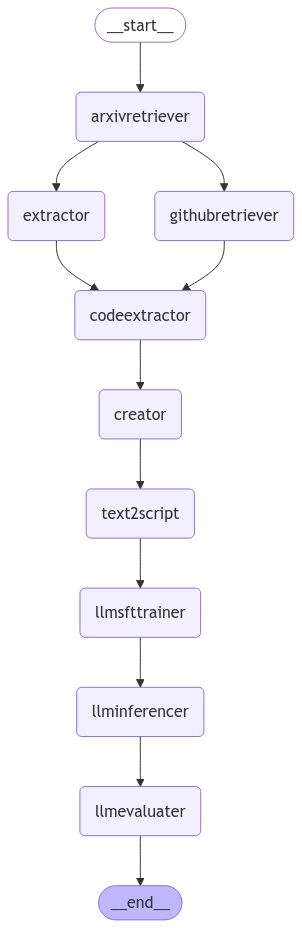

In [11]:
# Displaying graph images
image_dir = "/content/"
research_graph.make_image(image_dir)

from IPython.display import Image, display
image_path = "/content/ai_integrator_v1_graph.png"
display(Image(filename=image_path))

In [ ]:
# execution
result = research_graph(
    state=ai_integratorv1_setting,
)

# AI Integrator (Implementation ver.)

In [13]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph

from researchgraph.core.factory import NodeFactory
node_names = [
    "structuredoutput_llmnode",
    "retrieve_arxiv_text_node",
    "retrieve_github_repository_node",
    "text2script_node",
    "llmsfttrain_node",
    "llminference_node",
    "llmevaluate_node",
]

from researchgraph.graphs.ai_integrator.ai_integrator_v1 import (
    ai_integratorv1_setting,
    ai_integrator_v1_extractor_prompt,
    ai_integrator_v1_codeextractor_prompt,
    ai_integrator_v1_creator_prompt,
)

In [14]:
# Creating a graph
class State(TypedDict):
    objective: str
    method_template: str
    base_method_text: str
    base_method_code: str
    llm_script: str
    index: int
    arxiv_url: str
    github_url: str
    folder_structure: str
    github_file: str
    add_method_code: str
    paper_text: str
    add_method_text: str
    new_method_code: list
    new_method_text: list
    script_save_path: str
    model_save_path: str
    result_save_path: str
    accuracy: str


class AIIntegratorv1:
    def __init__(
        self,
        llm_name: str,
        save_dir: str,
        new_method_file_name: str,
        ft_model_name: str,
        dataset_name: str,
        model_save_dir_name: str,
        result_save_file_name: str,
        answer_data_path: str,
        ai_integrator_v1_extractor_prompt: str,
        ai_integrator_v1_codeextractor_prompt: str,
        ai_integrator_v1_creator_prompt: str,
        num_train_data: int | None = None,
        num_inference_data: int | None = None,
    ):
        self.llm_name = llm_name
        self.save_dir = save_dir
        self.new_method_file_name = new_method_file_name
        self.ft_model_name = ft_model_name
        self.dataset_name = dataset_name
        self.model_save_dir_name = model_save_dir_name
        self.result_save_file_name = result_save_file_name
        self.answer_data_path = answer_data_path
        self.ai_integrator_v1_extractor_prompt = ai_integrator_v1_extractor_prompt
        self.ai_integrator_v1_codeextractor_prompt = ai_integrator_v1_codeextractor_prompt
        self.ai_integrator_v1_creator_prompt = ai_integrator_v1_creator_prompt
        self.num_train_data = num_train_data
        self.num_inference_data = num_inference_data

        if not os.path.exists(self.save_dir):
            os.makedirs(self.save_dir)
        self.graph_builder = StateGraph(State)

        self.graph_builder.add_node(
            "githubretriever",
            NodeFactory.create_node(
                node_name="retrieve_github_repository_node",
                save_dir=self.save_dir,
                input_key=["github_url"],
                output_key=["folder_structure", "github_file"],
            ),
        )
        self.graph_builder.add_node(
            "arxivretriever",
            NodeFactory.create_node(
                node_name="retrieve_arxiv_text_node",
                save_dir=self.save_dir,
                input_key=["arxiv_url"],
                output_key=["paper_text"],
            ),
        )
        self.graph_builder.add_node(
            "extractor",
            NodeFactory.create_node(
                node_name="structuredoutput_llmnode",
                input_key=["paper_text"],
                output_key=["add_method_text"],
                llm_name=self.llm_name,
                prompt_template=self.ai_integrator_v1_extractor_prompt,
            ),
        )
        self.graph_builder.add_node(
            "codeextractor",
            NodeFactory.create_node(
                node_name="structuredoutput_llmnode",
                input_key=["add_method_text", "folder_structure", "github_file"],
                output_key=["add_method_code"],
                llm_name=self.llm_name,
                prompt_template=self.ai_integrator_v1_codeextractor_prompt,
            ),
        )
        self.graph_builder.add_node(
            "creator",
            NodeFactory.create_node(
                node_name="structuredoutput_llmnode",
                input_key=[
                    "objective",
                    "add_method_text",
                    "add_method_code",
                    "base_method_text",
                    "base_method_code",
                    "method_template",
                ],
                output_key=["new_method_text", "new_method_code"],
                llm_name=self.llm_name,
                prompt_template=self.ai_integrator_v1_creator_prompt,
            ),
        )
        self.graph_builder.add_node(
            "text2script",
            NodeFactory.create_node(
                node_name="text2script_node",
                input_key=["new_method_code"],
                output_key=["script_save_path"],
                save_file_path=os.path.join(self.save_dir, self.new_method_file_name),
            ),
        )
        self.graph_builder.add_node(
            "llmsfttrainer",
            NodeFactory.create_node(
                node_name="llmsfttrain_node",
                model_name=self.ft_model_name,
                dataset_name=self.dataset_name,
                num_train_data=self.num_train_data,
                model_save_path=os.path.join(self.save_dir, self.model_save_dir_name),
                lora=True,
                input_key=["script_save_path"],
                output_key=["model_save_path"],
            ),
        )
        self.graph_builder.add_node(
            "llminferencer",
            NodeFactory.create_node(
                node_name="llminference_node",
                input_key=["model_save_path"],
                output_key=["result_save_path"],
                dataset_name=self.dataset_name,
                num_inference_data=self.num_inference_data,
                result_save_path=os.path.join(
                    self.save_dir, self.result_save_file_name
                ),
            ),
        )
        self.graph_builder.add_node(
            "llmevaluater",
            NodeFactory.create_node(
                node_name="llmevaluate_node",
                input_key=["result_save_path"],
                output_key=["accuracy"],
                answer_data_path=self.answer_data_path,
            ),
        )

        # make edges
        self.graph_builder.add_edge("arxivretriever", "githubretriever")
        self.graph_builder.add_edge("arxivretriever", "extractor")
        self.graph_builder.add_edge(["githubretriever", "extractor"], "codeextractor")
        self.graph_builder.add_edge("codeextractor", "creator")
        self.graph_builder.add_edge("creator", "text2script")
        self.graph_builder.add_edge("text2script", "llmsfttrainer")
        self.graph_builder.add_edge("llmsfttrainer", "llminferencer")
        self.graph_builder.add_edge("llminferencer", "llmevaluater")

        # set entry and finish points
        self.graph_builder.set_entry_point("arxivretriever")
        self.graph_builder.set_finish_point("llmevaluater")

        self.graph = self.graph_builder.compile()

    def __call__(self, state: State) -> dict:
        result = self.graph.invoke(state, debug=True)
        return result

In [ ]:
# AI Integrator settings
llm_name = "gpt-4o-2024-08-06"  # LLM that executes AI Integrator
save_dir = "/content/drive/MyDrive/AutoRes/ai_integrator/exec-test"  # Directory to save all output results
ft_model_name = "unsloth/Meta-Llama-3.1-8B"  # A model that learns using a new method
dataset_name = "openai/gsm8k"  # Dataset for learning and inference
new_method_file_name = "new_method.py"  # Script name for writing new methods
model_save_dir_name = "train_model"  # Directory name to save the learned model
result_save_file_name = "pred_file.csv"  # Name of the CSV file to save the inference results
# Download the answer data from the link below.
# https://drive.google.com/file/d/1u39CMNPsvO4OMehXrSOZCaZcdciOsC7x/view?usp=drive_link
answer_data_path = '/content/drive/MyDrive/AutoRes/ai_integrator/gsm8k_answer.csv'  # Correct data in the data set used for evaluation
num_train_data = 30  # Number of learning data (if not set, all learning data will be used)
num_inference_data = 30 # Number of inference data (if not set, all data will be inferred)

research_graph = AIIntegratorv1(
    llm_name = llm_name,
    save_dir = save_dir,
    new_method_file_name = new_method_file_name,
    ft_model_name = ft_model_name,
    dataset_name= dataset_name,
    model_save_dir_name = model_save_dir_name,
    result_save_file_name = result_save_file_name,
    answer_data_path = answer_data_path,
    ai_integrator_v1_extractor_prompt = ai_integrator_v1_extractor_prompt,
    ai_integrator_v1_codeextractor_prompt = ai_integrator_v1_codeextractor_prompt,
    ai_integrator_v1_creator_prompt = ai_integrator_v1_creator_prompt,
    num_train_data = num_train_data,
    num_inference_data = num_inference_data,
)

input: ['github_url']
output: ['folder_structure', 'github_file']
input: ['arxiv_url']
output: ['paper_text']
input: ['paper_text']
output: ['add_method_text']
input: ['add_method_text', 'folder_structure', 'github_file']
output: ['add_method_code']
input: ['objective', 'add_method_text', 'add_method_code', 'base_method_text', 'base_method_code', 'method_template']
output: ['new_method_text', 'new_method_code']
input: ['new_method_code']
output: ['script_save_path']
input: ['script_save_path']
output: ['model_save_path']
==((====))==  Unsloth 2024.12.4: Fast Llama patching. Transformers:4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post2. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
__reduc

Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

input: ['model_save_path']
output: ['result_save_path']
input: ['result_save_path']
output: ['accuracy']


In [ ]:
# execution
result = research_graph(
    state=ai_integratorv1_setting,
)